In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import cv2
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import shuffle
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

2025-10-01 14:19:07.289897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759328347.534016      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759328347.605513      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
base_dir = "/kaggle/input/brain-tumor-mri-dataset"
train_dir = os.path.join(base_dir, "Training")
test_dir = os.path.join(base_dir, "Testing")

In [3]:
tumor_classes = ["glioma", "meningioma", "pituitary"]
notumor_class = "notumor"

In [4]:
input_size = 64

def load_images_from_folder(folder, label):
    data = []
    labels = []
    for img_name in os.listdir(folder):
        ext = img_name.split('.')[-1].lower()
        if ext in ['jpg','jpeg','png']:
            img = cv2.imread(os.path.join(folder, img_name))
            img = Image.fromarray(img, 'RGB')
            img = img.resize((input_size, input_size))
            data.append(np.array(img))
            labels.append(label)
    return data, labels

In [5]:
# Training data
x_train, y_train = [], []

# tumor = 1
for cls in tumor_classes:
    data, labels = load_images_from_folder(os.path.join(train_dir, cls), 1)
    x_train += data
    y_train += labels

# notumor = 0
data, labels = load_images_from_folder(os.path.join(train_dir, notumor_class), 0)
x_train += data
y_train += labels

In [6]:
# Testing data
x_test, y_test = [], []

for cls in tumor_classes:
    data, labels = load_images_from_folder(os.path.join(test_dir, cls), 1)
    x_test += data
    y_test += labels

data, labels = load_images_from_folder(os.path.join(test_dir, notumor_class), 0)
x_test += data
y_test += labels

In [7]:
# تحويل لقوائم numpy
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_test, y_test = shuffle(x_test, y_test, random_state=42)

# normalize
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

print("Training shape:", x_train.shape, y_train.shape)
print("Testing shape:", x_test.shape, y_test.shape)


Training shape: (5712, 64, 64, 3) (5712,)
Testing shape: (1311, 64, 64, 3) (1311,)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
import tensorflow as tf

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(input_size, input_size, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))  # Binary

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    verbose=1)

model.save("binary_brain_tumor.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-01 14:32:56.731374: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - accuracy: 0.7766 - loss: 0.4487 - val_accuracy: 0.9184 - val_loss: 0.2097
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.9571 - loss: 0.1436 - val_accuracy: 0.9451 - val_loss: 0.1665
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.9734 - loss: 0.0839 - val_accuracy: 0.9443 - val_loss: 0.1330
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.9729 - loss: 0.0836 - val_accuracy: 0.9748 - val_loss: 0.0830
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.9834 - loss: 0.0609 - val_accuracy: 0.9741 - val_loss: 0.0828
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.9882 - loss: 0.0443 - val_accuracy: 0.9817 - val_loss: 0.0566
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.9905 - loss: 0.0333 - val_accuracy: 0.9847 - val_loss: 0.0457
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.9918 - loss: 0

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


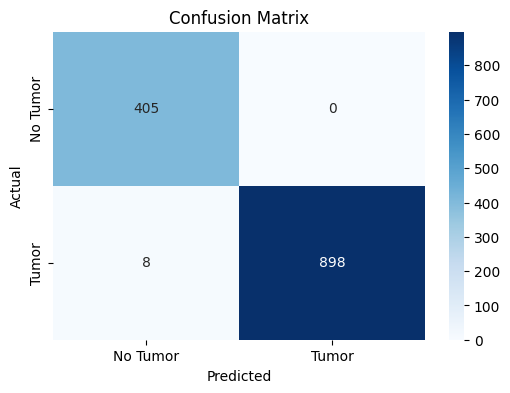

Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.98      1.00      0.99       405
       Tumor       1.00      0.99      1.00       906

    accuracy                           0.99      1311
   macro avg       0.99      1.00      0.99      1311
weighted avg       0.99      0.99      0.99      1311



In [11]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

# ====== Confusion Matrix ======
y_pred = (model.predict(x_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ====== Classification Report ======
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Tumor", "Tumor"]))

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


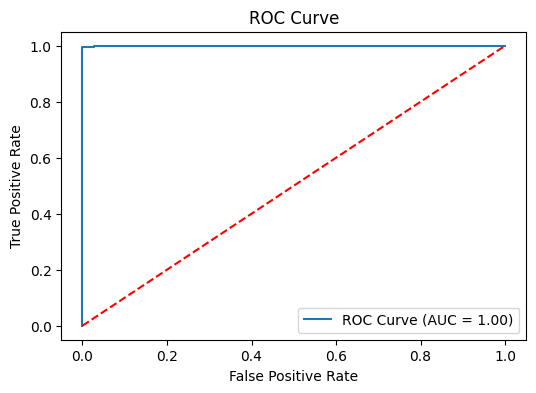

In [12]:
# ====== ROC Curve ======
y_pred_prob = model.predict(x_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

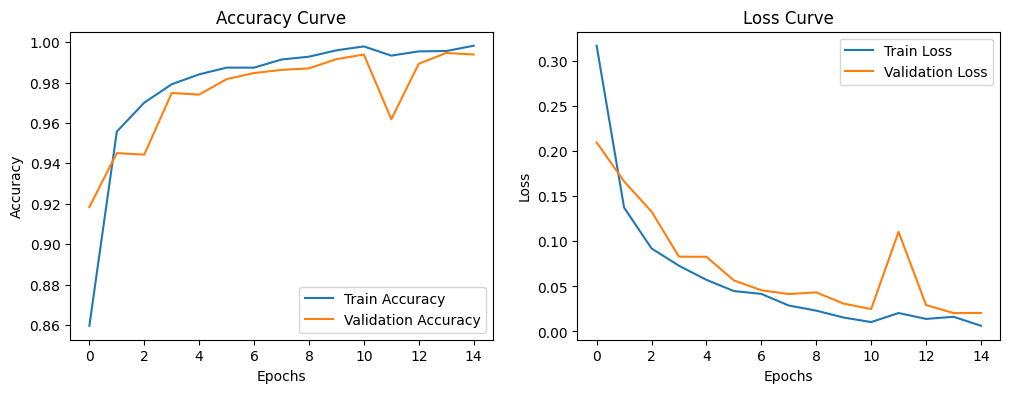

In [13]:

# ====== Accuracy & Loss Curves ======
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.show()
